<a href="https://colab.research.google.com/github/zdanielshi/personal_projects/blob/main/RELY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install yfinance

In [ ]:
pip install yfinance

Import libraries

In [4]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

Define the start and end times. Start time is March 22, 2022, the end of the RELY lockup. End date is coded to today.

In [71]:
start_date = '2022-03-22'
end_date = dt.date.today().strftime('%Y-%m-%d')

In [72]:
rely = yf.Ticker('rely')
rely_close = rely.history(interval='1d', start=start_date, end=end_date)['Close']
rely_close = rely_close.tolist()

rely_returns = [] # initialize a returns list
for i in rely_close: # iterate through the close list
  rely_returns.append((i / rely_close[0]) - 1)# calculate each value against the 0 index value, append to the returns list


In [73]:
pypl = yf.Ticker('pypl')
pypl_close = pypl.history(interval='1d', start=start_date, end=end_date)['Close']
pypl_close = pypl_close.tolist()

pypl_returns = [] # initialize a returns list
for i in pypl_close: # iterate through the close list
  pypl_returns.append((i / pypl_close[0]) - 1)# calculate each value against the 0 index value, append to the returns list


In [74]:
sq = yf.Ticker('sq')
sq_close = sq.history(interval='1d', start=start_date, end=end_date)['Close']
sq_close = sq_close.tolist()

sq_returns = [] # initialize a returns list
for i in sq_close: # iterate through the close list
  sq_returns.append((i / sq_close[0]) - 1)# calculate each value against the 0 index value, append to the returns list


<function matplotlib.pyplot.show>

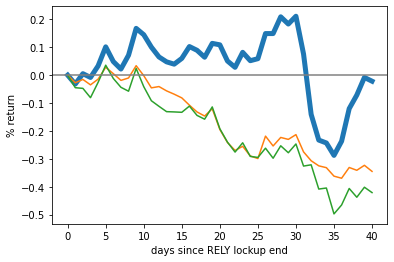

In [75]:
plt.plot(rely_returns, lw=5)
plt.plot(pypl_returns)
plt.plot(sq_returns)

plt.ylabel("% return")
plt.xlabel("days since RELY lockup end")
plt.axhline(y=0, color = 'gray')
plt.show

In [12]:
# hold the old tickers list


# tickers_list = [
#                 'RELY',   #Remitly
#                 'PYPL',   #Paypal
#                 'SQ',     #Square
#                 'COIN',   #Coinbase
#                 'ML',     #Monyelion
#                 'DAVE',   #Dave
#                 'NU',     #Nubank
#                 'FLYW',   #Flywire
#                 'PAYO',   #Payoneer
#                 'TOST',   #Toast
#                 'SOFI',   #Sofi
#                 'DLO',    #dLocal
#                 'HOOD',   #Robinhood
#                 'UPST',   #Upstart        
#                 'GDOT',   #Green Dot
#                 'SPY',    #SP500
#                 '^NDXT'   #NASDAQ 100 Technology
#                 ]

# data_download = yf.download(tickers_list, start = start_date, end = end_date)

[*********************100%***********************]  17 of 17 completed
